In [118]:
import timeit
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)

## Third Question Research : Benchmarking different Machine Learning models in terms of performance and execution time

In this research question, we try to answer these questions : what are the benefits and the drawbacks of using more complex models ? Is it necessary to use heavy models that take time to train and then to optimize when simpler models can achieve nearly the same but take less computational ressources ?
To adress them, we will benchmark different machine learning algorithms in terms of performance and execution time. We will do it on real-world datasets and synthetic datasets.

### Real-world datasets case

We load 3 different datasets : 

* First one is about covid, features contains symptoms and the values are yes or no (We do a little pre-processing step by encoding the values to 0 and 1).
* Second one is about predicting heart attacks
* Third one is about prediciting if Bill Clinton won a county using the demographic variables 

In [119]:
real_data = pd.read_csv("covid_dataset.csv").to_numpy()

We encode the data

In [164]:
from sklearn.preprocessing import LabelEncoder  

le = LabelEncoder()
for i in range(len(real_data[0])):
    real_data[:,i]=le.fit_transform(real_data[:,i])

print(real_data)

[[1 1 1 ... 0 0 1]
 [1 1 1 ... 0 0 1]
 [1 1 1 ... 0 0 1]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


In [165]:
X_real_data,y_real_data = real_data[:,:len(real_data[0])-1].astype(np.float64),real_data[:,len(real_data[0])-1].astype(np.float64)

In [166]:
real_data_2 = pd.read_csv("heart.csv").to_numpy()
X_real_data_2,y_real_data_2 = real_data_2[:,:len(real_data_2[0])-1],real_data_2[:,len(real_data_2[0])-1]
y_real_data_2

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [167]:
real_data_3 = pd.read_csv("election_dataset.csv").to_numpy()
real_data_3[:,-1] = le.fit_transform(real_data_3[:,-1])
real_data_3[:,-2] = le.fit_transform(real_data_3[:,-2])
X_real_data_3,y_real_data_3 = real_data_3[:,1:len(real_data_3[0])-1].astype(np.float64),real_data_3[:,len(real_data_3[0])-1].astype(np.float64)


In [168]:
X_real_data_3[0]

array([3.1700e+01, 5.7623e+04, 1.5768e+04, 1.5200e+01, 1.0740e+01,
       5.1410e+01, 6.0400e+01, 2.3600e+00, 4.5700e+02, 0.0000e+00])

In [125]:
print("number of label 0 real_data:",len(y_real_data[y_real_data==0]))
print("number of label 1 real_data:",len(y_real_data[y_real_data==1]))
print("number of label 0 real_data_2:",len(y_real_data_2[y_real_data_2==0]))
print("number of label 1 real_data_2:",len(y_real_data_2[y_real_data_2==1]))
print("number of label 0 real_data_3:",len(y_real_data_3[y_real_data_3==0]))
print("number of label 1 real_data_3:",len(y_real_data_3[y_real_data_3==1]))

number of label 0 real_data: 1051
number of label 1 real_data: 4383
number of label 0 real_data_2: 138
number of label 1 real_data_2: 165
number of label 0 real_data_3: 1220
number of label 1 real_data_3: 1193


We choose to do a train/validation, test split, and even if the real data is highly unbalanced we try to have the same proportion of label 0 and 1 in every set (regardless the results of research question 2, we are interested in comparing the performances of each models, not optimizing it)

For real data world 1

In [169]:
from sklearn.model_selection import train_test_split

X_train_rd_lb_0, X_valtest_rd_lb_0, y_train_rd_lb_0, y_valtest_rd_lb_0 = train_test_split(X_real_data[y_real_data==0],y_real_data[y_real_data==0], test_size=0.2)
X_val_rd_lb_0, X_test_rd_lb_0, y_val_rd_lb_0, y_test_rd_lb_0 = train_test_split(X_valtest_rd_lb_0,y_valtest_rd_lb_0, test_size=0.5)

In [170]:
X_train_rd_lb_1, X_valtest_rd_lb_1, y_train_rd_lb_1, y_valtest_rd_lb_1 = train_test_split(X_real_data[y_real_data==1],y_real_data[y_real_data==1], test_size=0.2)
X_val_rd_lb_1, X_test_rd_lb_1, y_val_rd_lb_1, y_test_rd_lb_1 = train_test_split(X_valtest_rd_lb_1,y_valtest_rd_lb_1, test_size=0.5)

For real data world 2

In [171]:
from sklearn.model_selection import train_test_split

X_train_rd_2_lb_0, X_valtest_rd_2_lb_0, y_train_rd_2_lb_0, y_valtest_rd_2_lb_0 = train_test_split(X_real_data_2[y_real_data_2==0],y_real_data_2[y_real_data_2==0], test_size=0.2)
X_val_rd_2_lb_0, X_test_rd_2_lb_0, y_val_rd_2_lb_0, y_test_rd_2_lb_0 = train_test_split(X_valtest_rd_2_lb_0,y_valtest_rd_2_lb_0, test_size=0.5)

In [172]:
X_train_rd_2_lb_1, X_valtest_rd_2_lb_1, y_train_rd_2_lb_1, y_valtest_rd_2_lb_1 = train_test_split(X_real_data_2[y_real_data_2==1],y_real_data_2[y_real_data_2==1], test_size=0.2)
X_val_rd_2_lb_1, X_test_rd_2_lb_1, y_val_rd_2_lb_1, y_test_rd_2_lb_1 = train_test_split(X_valtest_rd_2_lb_1,y_valtest_rd_2_lb_1, test_size=0.5)

For real data world 3

In [130]:
from sklearn.model_selection import train_test_split

X_train_rd_3_lb_0, X_valtest_rd_3_lb_0, y_train_rd_3_lb_0, y_valtest_rd_3_lb_0 = train_test_split(X_real_data_3[y_real_data_3==0],y_real_data_3[y_real_data_3==0], test_size=0.2)
X_val_rd_3_lb_0, X_test_rd_3_lb_0, y_val_rd_3_lb_0, y_test_rd_3_lb_0 = train_test_split(X_valtest_rd_3_lb_0,y_valtest_rd_3_lb_0, test_size=0.5)

In [131]:
X_train_rd_3_lb_1, X_valtest_rd_3_lb_1, y_train_rd_3_lb_1, y_valtest_rd_3_lb_1 = train_test_split(X_real_data_3[y_real_data_3==1],y_real_data_3[y_real_data_3==1], test_size=0.2)
X_val_rd_3_lb_1, X_test_rd_3_lb_1, y_val_rd_3_lb_1, y_test_rd_3_lb_1 = train_test_split(X_valtest_rd_3_lb_1,y_valtest_rd_3_lb_1, test_size=0.5)

In [132]:
X_train_rd = np.concatenate([X_train_rd_lb_0,X_train_rd_lb_1])
X_train_rd_2 = np.concatenate([X_train_rd_2_lb_0,X_train_rd_2_lb_1])
X_train_rd_3 = np.concatenate([X_train_rd_3_lb_0,X_train_rd_3_lb_1])


In [133]:
y_train_rd = np.concatenate([y_train_rd_lb_0,y_train_rd_lb_1])
y_train_rd_2 = np.concatenate([y_train_rd_2_lb_0,y_train_rd_2_lb_1])
y_train_rd_3 = np.concatenate([y_train_rd_3_lb_0,y_train_rd_3_lb_1])

In [134]:
X_val_rd = np.concatenate([X_val_rd_lb_0,X_val_rd_lb_1])
X_val_rd_2 = np.concatenate([X_val_rd_2_lb_0,X_val_rd_2_lb_1])
X_val_rd_3 = np.concatenate([X_val_rd_3_lb_0,X_val_rd_3_lb_1])

In [135]:
y_val_rd = np.concatenate([y_val_rd_lb_0,y_val_rd_lb_1])
y_val_rd_2 = np.concatenate([y_val_rd_2_lb_0,y_val_rd_2_lb_1])
y_val_rd_3 = np.concatenate([y_val_rd_3_lb_0,y_val_rd_3_lb_1])

In [136]:
X_test_rd = np.concatenate([X_test_rd_lb_0,X_test_rd_lb_1])
X_test_rd_2 = np.concatenate([X_test_rd_2_lb_0,X_test_rd_2_lb_1])
X_test_rd_3 = np.concatenate([X_test_rd_3_lb_0,X_test_rd_3_lb_1])

In [137]:
y_test_rd = np.concatenate([y_test_rd_lb_0,y_test_rd_lb_1])
y_test_rd_2 = np.concatenate([y_test_rd_2_lb_0,y_test_rd_2_lb_1])
y_test_rd_3 = np.concatenate([y_test_rd_3_lb_0,y_test_rd_3_lb_1])

In [138]:
train_indexes_rd  = np.arange(len(X_train_rd))
np.random.shuffle(train_indexes_rd)
X_train_rd = X_train_rd[train_indexes_rd]
y_train_rd  = y_train_rd[train_indexes_rd]

val_indexes_rd = np.arange(len(X_val_rd))
np.random.shuffle(val_indexes_rd)
X_val_rd = X_val_rd[val_indexes_rd]
y_val_rd = y_val_rd[val_indexes_rd]

test_indexes_rd = np.arange(len(X_test_rd))
np.random.shuffle(test_indexes_rd)
X_test_rd = X_test_rd[test_indexes_rd]
y_test_rd = y_test_rd[test_indexes_rd]

In [139]:
train_indexes_rd_2  = np.arange(len(X_train_rd_2))
np.random.shuffle(train_indexes_rd_2)
X_train_rd_2 = X_train_rd_2[train_indexes_rd_2]
y_train_rd_2  = y_train_rd_2[train_indexes_rd_2]

val_indexes_rd_2 = np.arange(len(X_val_rd_2))
np.random.shuffle(val_indexes_rd_2)
X_val_rd_2 = X_val_rd_2[val_indexes_rd_2]
y_val_rd_2 = y_val_rd_2[val_indexes_rd_2]

test_indexes_rd_2 = np.arange(len(X_test_rd_2))
np.random.shuffle(test_indexes_rd_2)
X_test_rd_2 = X_test_rd_2[test_indexes_rd_2]
y_test_rd_2 = y_test_rd_2[test_indexes_rd_2]

In [140]:
train_indexes_rd_3  = np.arange(len(X_train_rd_3))
np.random.shuffle(train_indexes_rd_3)
X_train_rd_3 = X_train_rd_3[train_indexes_rd_3]
y_train_rd_3  = y_train_rd_3[train_indexes_rd_3]

val_indexes_rd_3 = np.arange(len(X_val_rd_3))
np.random.shuffle(val_indexes_rd_3)
X_val_rd_3 = X_val_rd_3[val_indexes_rd_3]
y_val_rd_3 = y_val_rd_3[val_indexes_rd_3]

test_indexes_rd_3 = np.arange(len(X_test_rd_3))
np.random.shuffle(test_indexes_rd_3)
X_test_rd_3 = X_test_rd_3[test_indexes_rd_3]
y_test_rd_3 = y_test_rd_3[test_indexes_rd_3]

In [141]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC

from sklearn.metrics import f1_score


We create models without any tuning to "equaly" compare all the models 

In [142]:
def SVM(training_set,validation_set,test_set,labels_training,labels_validation,labels_test):
    train_set = np.concatenate([training_set,validation_set])
    label_train_set = np.concatenate([labels_training,labels_validation])
    scaler = StandardScaler()
    scaler.fit(train_set)
    train_set_standardized = scaler.transform(train_set)
    model = SVC(gamma='auto')
    model.fit(train_set_standardized, label_train_set.ravel())
    test_set_standardized = scaler.transform(test_set)
    y_pred = model.predict(test_set_standardized)
    test_error = f1_score(labels_test,y_pred)
    score_false_negativ = 0
    nb_positivs = 0
    for i in range(len(labels_test)):
        if labels_test[i]:
            nb_positivs+=1
            if y_pred[i]:
                score_false_negativ+=1
    return test_error,score_false_negativ/nb_positivs

In [143]:
def PLA(training_set,validation_set,test_set,labels_training,labels_validation,labels_test):
    train_set = np.concatenate([training_set,validation_set])
    label_train_set = np.concatenate([labels_training,labels_validation])
    scaler = StandardScaler()
    scaler.fit(train_set)
    train_set_standardized = scaler.transform(train_set)
    model = Perceptron()
    model.fit(train_set_standardized, label_train_set.ravel())
    test_set_standardized = scaler.transform(test_set)
    y_pred = model.predict(test_set_standardized)
    test_error = f1_score(labels_test,y_pred)
    score_false_negativ = 0
    nb_positivs = 0
    for i in range(len(labels_test)):
        if labels_test[i]:
            nb_positivs+=1
            if y_pred[i]:
                score_false_negativ+=1
    return test_error,score_false_negativ/nb_positivs

In [144]:
def PCA_PLA(training_set,validation_set,test_set,labels_training,labels_validation,labels_test):
    train_set = np.concatenate([training_set,validation_set])
    label_train_set = np.concatenate([labels_training,labels_validation])
    scaler = StandardScaler()
    scaler.fit(train_set)
    train_set_standardized = scaler.transform(train_set)
    pca = PCA(0.9)
    pca.fit(train_set_standardized)
    train_set_transformed = pca.transform(train_set_standardized)
    model = Perceptron()
    model.fit(train_set_transformed, label_train_set.ravel())
    test_set_transformed = pca.transform(scaler.transform(test_set))
    y_pred = model.predict(test_set_transformed)
    test_error = f1_score(labels_test,y_pred)
    score_false_negativ = 0
    nb_positivs = 0
    for i in range(len(labels_test)):
        if labels_test[i]:
            nb_positivs+=1
            if y_pred[i]:
                score_false_negativ+=1
    return test_error,score_false_negativ/nb_positivs

In [145]:
def Random_Forest(training_set,validation_set,test_set,labels_training,labels_validation,labels_test):
    train_set = np.concatenate([training_set,validation_set])
    label_train_set = np.concatenate([labels_training,labels_validation])
    scaler = StandardScaler()
    scaler.fit(train_set)
    train_set_standardized = scaler.transform(train_set)
    model = RandomForestClassifier()
    model.fit(train_set_standardized, label_train_set.ravel())
    test_set_standardized = scaler.transform(test_set)
    y_pred = model.predict(test_set_standardized)
    test_error = f1_score(labels_test,y_pred)
    score_false_negativ = 0
    nb_positivs = 0
    for i in range(len(labels_test)):
        if labels_test[i]:
            nb_positivs+=1
            if y_pred[i]:
                score_false_negativ+=1
    return test_error,score_false_negativ/nb_positivs

In [146]:
def Random_Forest_PCA(training_set,validation_set,test_set,labels_training,labels_validation,labels_test):
    train_set = np.concatenate([training_set,validation_set])
    label_train_set = np.concatenate([labels_training,labels_validation])
    scaler = StandardScaler()
    scaler.fit(train_set)
    train_set_standardized = scaler.transform(train_set)
    pca = PCA(0.9)
    pca.fit(train_set_standardized)
    train_set_transformed = pca.transform(train_set_standardized)
    model = RandomForestClassifier()
    model.fit(train_set_transformed,label_train_set.ravel())
    test_set_transformed = pca.transform(scaler.transform(test_set))
    y_pred = model.predict(test_set_transformed)
    test_error = f1_score(labels_test,y_pred)
    score_false_negativ = 0
    nb_positivs = 0
    for i in range(len(labels_test)):
        if labels_test[i]:
            nb_positivs+=1
            if y_pred[i]:
                score_false_negativ+=1
    return test_error,score_false_negativ/nb_positivs

In [147]:
def SVM_training_Cross_Validation(training_set,validation_set,test_set,labels_training,labels_validation,labels_test):
    kf = KFold(10)
    models_scores_val_SVC = []
    train_set = np.concatenate([training_set,validation_set])
    label_train_set = np.concatenate([labels_training,labels_validation])
    scaler = StandardScaler()
    scaler.fit(train_set)
    train_set_standardized = scaler.transform(train_set)
    for train_indexes, val_indexes in kf.split(train_set_standardized):
        model_temp = SVC(gamma='auto')
        model_temp.fit(train_set_standardized[train_indexes], label_train_set[train_indexes].ravel())
        #y_hat_train_temp = lin_reg_temp.predict(train_set_standardized[train_indexes])
        y_pred_temp = model_temp.predict(train_set_standardized[val_indexes])
        f1_score_temp = f1_score(label_train_set[val_indexes],y_pred_temp)

        score_false_negativ = 0
        y_folds = label_train_set[val_indexes]
        for i in range(len(label_train_set[val_indexes])):
            if y_folds[i] and not(y_pred_temp[i]):
                score_false_negativ+=1
        models_scores_val_SVC.append([model_temp,f1_score_temp,score_false_negativ])
    models_scores_val_SVC = np.array(models_scores_val_SVC)
    test_set_standardized = scaler.transform(test_set)
    model = models_scores_val_SVC[models_scores_val_SVC[:,1] == max(models_scores_val_SVC[:,1])][0][0]
    y_pred = model.predict(test_set_standardized)
    test_error = f1_score(labels_test,y_pred)
    score_false_negativ = 0
    nb_positivs = 0
    for i in range(len(labels_test)):
        if labels_test[i]:
            nb_positivs+=1
            if y_pred[i]:
                score_false_negativ+=1
    return test_error,score_false_negativ/nb_positivs
    

We define global variables to do the performance and the executing time tests. We choose to run only twice each test regarding the limit computational power of my computer, but feel free to modify the `num-runs` variable to do multiple time the tests and take the average result for performance and execution time.

In [173]:
nb_models = 6
nb_rd_set = 3
f1_scores = np.zeros((nb_models,nb_rd_set))
false_negativ_scores = np.zeros((nb_models,nb_rd_set))
avg_durations = np.zeros((nb_models,nb_rd_set))
num_runs = 2
models = ["SVM","PLA","PCA_PLA","Random_Forest","Random_Forest_PCA","SVM_training_Cross_Validation"]

We set up the tests to do for each dataset with each model

In [174]:
def test_time_SVM_rd():
    global X_train_rd, X_val_rd, X_test_rd, y_train_rd, y_val_rd, y_test_rd, f1_scores, false_negativ_scores, num_runs
    test_error,score_false_negativ = SVM(X_train_rd,X_val_rd,X_test_rd,y_train_rd,y_val_rd,y_test_rd)
    f1_scores[0,1] += test_error/num_runs
    false_negativ_scores[0,1] += score_false_negativ/num_runs

def test_time_PLA_rd():
    global X_train_rd, X_val_rd, X_test_rd, y_train_rd, y_val_rd, y_test_rd, f1_scores, false_negativ_scores, num_runs
    test_error,score_false_negativ = PLA(X_train_rd,X_val_rd,X_test_rd,y_train_rd,y_val_rd,y_test_rd)
    f1_scores[1,1] += test_error/num_runs
    false_negativ_scores[1,1] += score_false_negativ/num_runs

def test_time_PCA_PLA_rd():
    global X_train_rd, X_val_rd, X_test_rd, y_train_rd, y_val_rd, y_test_rd, f1_scores, false_negativ_scores, num_runs
    test_error,score_false_negativ = PCA_PLA(X_train_rd,X_val_rd,X_test_rd,y_train_rd,y_val_rd,y_test_rd)
    f1_scores[2,1] += test_error/num_runs
    false_negativ_scores[2,1] += score_false_negativ/num_runs

def test_time_Random_Forest_rd():
    global X_train_rd, X_val_rd, X_test_rd, y_train_rd, y_val_rd, y_test_rd, f1_scores, false_negativ_scores, num_runs
    test_error,score_false_negativ = Random_Forest(X_train_rd,X_val_rd,X_test_rd,y_train_rd,y_val_rd,y_test_rd)
    f1_scores[3,1] += test_error/num_runs
    false_negativ_scores[3,1] += score_false_negativ/num_runs

def test_time_Random_Forest_PCA_rd():
    global X_train_rd, X_val_rd, X_test_rd, y_train_rd, y_val_rd, y_test_rd, f1_scores, false_negativ_scores, num_runs
    test_error,score_false_negativ = Random_Forest_PCA(X_train_rd,X_val_rd,X_test_rd,y_train_rd,y_val_rd,y_test_rd)
    f1_scores[4,1] += test_error/num_runs
    false_negativ_scores[4,1] += score_false_negativ/num_runs

def test_time_SVM_training_Cross_Validation_rd():
    global X_train_rd, X_val_rd, X_test_rd, y_train_rd, y_val_rd, y_test_rd, f1_scores, false_negativ_scores, num_runs
    test_error,score_false_negativ = SVM_training_Cross_Validation(X_train_rd,X_val_rd,X_test_rd,y_train_rd,y_val_rd,y_test_rd)
    f1_scores[5,1] += test_error/num_runs
    false_negativ_scores[5,1] += score_false_negativ/num_runs


In [188]:
def test_time_SVM_rd_2():
    global X_train_rd_2, X_val_rd_2, X_test_rd_2, y_train_rd_2, y_val_rd_2, y_test_rd_2, f1_scores, false_negativ_scores,num_runs
    test_error,score_false_negativ = SVM(X_train_rd_2,X_val_rd_2,X_test_rd_2,y_train_rd_2,y_val_rd_2,y_test_rd_2)
    f1_scores[0,0] += test_error/num_runs
    false_negativ_scores[0,0] += score_false_negativ/num_runs

def test_time_PLA_rd_2():
    global X_train_rd_2, X_val_rd_2, X_test_rd_2, y_train_rd_2, y_val_rd_2, y_test_rd_2, f1_scores, false_negativ_scores,num_runs
    test_error,score_false_negativ = PLA(X_train_rd_2,X_val_rd_2,X_test_rd_2,y_train_rd_2,y_val_rd_2,y_test_rd_2)
    f1_scores[1,0] += test_error/num_runs
    false_negativ_scores[1,0] += score_false_negativ/num_runs

def test_time_PCA_PLA_rd_2():
    global X_train_rd_2, X_val_rd_2, X_test_rd_2, y_train_rd_2, y_val_rd_2, y_test_rd_2, f1_scores, false_negativ_scores,num_runs
    test_error,score_false_negativ = PCA_PLA(X_train_rd_2,X_val_rd_2,X_test_rd_2,y_train_rd_2,y_val_rd_2,y_test_rd_2)
    f1_scores[2,0] += test_error/num_runs
    false_negativ_scores[2,0] += score_false_negativ/num_runs

def test_time_Random_Forest_rd_2():
    global X_train_rd_2, X_val_rd_2, X_test_rd_2, y_train_rd_2, y_val_rd_2, y_test_rd_2, f1_scores, false_negativ_scores,num_runs
    test_error,score_false_negativ = Random_Forest(X_train_rd_2,X_val_rd_2,X_test_rd_2,y_train_rd_2,y_val_rd_2,y_test_rd_2)
    f1_scores[3,0] += test_error/num_runs
    false_negativ_scores[3,0] += score_false_negativ/num_runs

def test_time_Random_Forest_PCA_rd_2():
    global X_train_rd_2, X_val_rd_2, X_test_rd_2, y_train_rd_2, y_val_rd_2, y_test_rd_2, f1_scores, false_negativ_scores,num_runs
    test_error,score_false_negativ = Random_Forest_PCA(X_train_rd_2,X_val_rd_2,X_test_rd_2,y_train_rd_2,y_val_rd_2,y_test_rd_2)
    f1_scores[4,0] += test_error/num_runs
    false_negativ_scores[4,0] += score_false_negativ/num_runs

def test_time_SVM_training_Cross_Validation_rd_2():
    global X_train_rd_2, X_val_rd_2, X_test_rd_2, y_train_rd_2, y_val_rd_2, y_test_rd_2, f1_scores, false_negativ_scores,num_runs
    test_error,score_false_negativ = SVM_training_Cross_Validation(X_train_rd_2,X_val_rd_2,X_test_rd_2,y_train_rd_2,y_val_rd_2,y_test_rd_2)
    f1_scores[5,0] += test_error/num_runs
    false_negativ_scores[5,0] += score_false_negativ/num_runs


In [176]:
def test_time_SVM_rd_3():
    global X_train_rd_3, X_val_rd_3, X_test_rd_3, y_train_rd_3, y_val_rd_3, y_test_rd_3, f1_scores, false_negativ_scores,num_runs
    test_error,score_false_negativ = SVM(X_train_rd_3,X_val_rd_3,X_test_rd_3,y_train_rd_3,y_val_rd_3,y_test_rd_3)
    f1_scores[0,2] += test_error/num_runs
    false_negativ_scores[0,2] += score_false_negativ/num_runs

def test_time_PLA_rd_3():
    global X_train_rd_3, X_val_rd_3, X_test_rd_3, y_train_rd_3, y_val_rd_3, y_test_rd_3, f1_scores, false_negativ_scores,num_runs
    test_error,score_false_negativ = PLA(X_train_rd_3,X_val_rd_3,X_test_rd_3,y_train_rd_3,y_val_rd_3,y_test_rd_3)
    f1_scores[1,2] += test_error/num_runs
    false_negativ_scores[1,2] += score_false_negativ/num_runs

def test_time_PCA_PLA_rd_3():
    global X_train_rd_3, X_val_rd_3, X_test_rd_3, y_train_rd_3, y_val_rd_3, y_test_rd_3, f1_scores, false_negativ_scores,num_runs
    test_error,score_false_negativ = PCA_PLA(X_train_rd_3,X_val_rd_3,X_test_rd_3,y_train_rd_3,y_val_rd_3,y_test_rd_3)
    f1_scores[2,2] += test_error/num_runs
    false_negativ_scores[2,2] += score_false_negativ/num_runs

def test_time_Random_Forest_rd_3():
    global X_train_rd_3, X_val_rd_3, X_test_rd_3, y_train_rd_3, y_val_rd_3, y_test_rd_3, f1_scores, false_negativ_scores,num_runs
    test_error,score_false_negativ = Random_Forest(X_train_rd_3,X_val_rd_3,X_test_rd_3,y_train_rd_3,y_val_rd_3,y_test_rd_3)
    f1_scores[3,2] += test_error/num_runs
    false_negativ_scores[3,2] += score_false_negativ/num_runs

def test_time_Random_Forest_PCA_rd_3():
    global X_train_rd_3, X_val_rd_3, X_test_rd_3, y_train_rd_3, y_val_rd_3, y_test_rd_3, f1_scores, false_negativ_scores,num_runs
    test_error,score_false_negativ = Random_Forest_PCA(X_train_rd_3,X_val_rd_3,X_test_rd_3,y_train_rd_3,y_val_rd_3,y_test_rd_3)
    f1_scores[4,2] += test_error/num_runs
    false_negativ_scores[4,2] += score_false_negativ/num_runs

def test_time_SVM_training_Cross_Validation_rd_3():
    global X_train_rd_3, X_val_rd_3, X_test_rd_3, y_train_rd_3, y_val_rd_3, y_test_rd_3, f1_scores, false_negativ_scores,num_runs
    test_error,score_false_negativ = SVM_training_Cross_Validation(X_train_rd_3,X_val_rd_3,X_test_rd_3,y_train_rd_3,y_val_rd_3,y_test_rd_3)
    f1_scores[5,2] += test_error/num_runs
    false_negativ_scores[5,2] += score_false_negativ/num_runs


We execute the tests

In [177]:
avg_durations[0,0]  += timeit.Timer(test_time_SVM_rd_2).timeit(number = num_runs)/num_runs
avg_durations[1,0]  += timeit.Timer(test_time_PLA_rd_2).timeit(number = num_runs)/num_runs
avg_durations[2,0]  += timeit.Timer(test_time_PCA_PLA_rd_2).timeit(number = num_runs)/num_runs
avg_durations[3,0]  += timeit.Timer(test_time_Random_Forest_rd_2).timeit(number = num_runs)/num_runs
avg_durations[4,0]  += timeit.Timer(test_time_Random_Forest_PCA_rd_2).timeit(number = num_runs)/num_runs
avg_durations[5,0]  += timeit.Timer(test_time_SVM_training_Cross_Validation_rd_2).timeit(number = num_runs)/num_runs

In [178]:
avg_durations[0,1]  += timeit.Timer(test_time_SVM_rd).timeit(number = num_runs)/num_runs
avg_durations[1,1]  += timeit.Timer(test_time_PLA_rd).timeit(number = num_runs)/num_runs
avg_durations[2,1]  += timeit.Timer(test_time_PCA_PLA_rd).timeit(number = num_runs)/num_runs
avg_durations[3,1]  += timeit.Timer(test_time_Random_Forest_rd).timeit(number = num_runs)/num_runs
avg_durations[4,1]  += timeit.Timer(test_time_Random_Forest_PCA_rd).timeit(number = num_runs)/num_runs
avg_durations[5,1]  += timeit.Timer(test_time_SVM_training_Cross_Validation_rd).timeit(number = num_runs)/num_runs

In [179]:
avg_durations[0,2]  += timeit.Timer(test_time_SVM_rd_3).timeit(number = num_runs)/num_runs
avg_durations[1,2]  += timeit.Timer(test_time_PLA_rd_3).timeit(number = num_runs)/num_runs
avg_durations[2,2]  += timeit.Timer(test_time_PCA_PLA_rd_3).timeit(number = num_runs)/num_runs
avg_durations[3,2]  += timeit.Timer(test_time_Random_Forest_rd_3).timeit(number = num_runs)/num_runs
avg_durations[4,2]  += timeit.Timer(test_time_Random_Forest_PCA_rd_3).timeit(number = num_runs)/num_runs
avg_durations[5,2]  += timeit.Timer(test_time_SVM_training_Cross_Validation_rd_3).timeit(number = num_runs)/num_runs

## Results

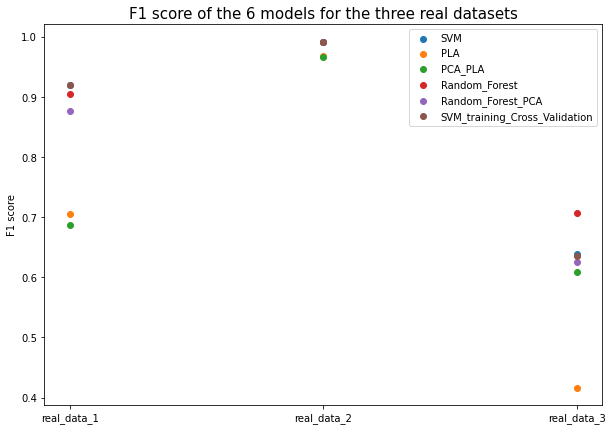

In [189]:
fig = plt.figure(figsize=(10,7))
plt.title("F1 score of the 6 models for the three real datasets", size=15)
plt.scatter(["real_data_1","real_data_2","real_data_3"],f1_scores[0],label=models[0])
plt.scatter(["real_data_1","real_data_2","real_data_3"],f1_scores[1],label=models[1])
plt.scatter(["real_data_1","real_data_2","real_data_3"],f1_scores[2],label=models[2])
plt.scatter(["real_data_1","real_data_2","real_data_3"],f1_scores[3],label=models[3])
plt.scatter(["real_data_1","real_data_2","real_data_3"],f1_scores[4],label=models[4])
plt.scatter(["real_data_1","real_data_2","real_data_3"],f1_scores[5],label=models[5])
plt.ylabel("F1 score")
plt.legend()

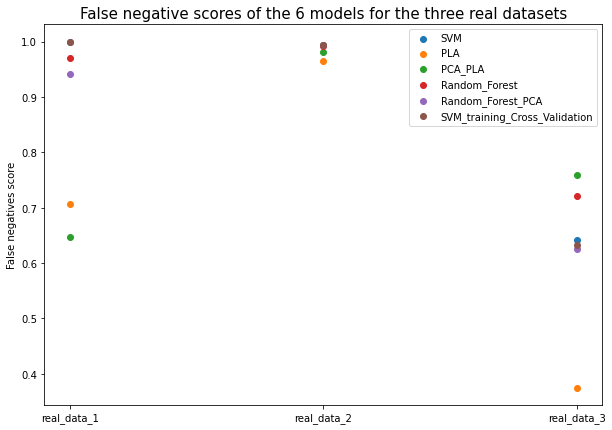

In [190]:
fig = plt.figure(figsize=(10,7))
plt.title("False negative scores of the 6 models for the three real datasets", size=15)
plt.scatter(["real_data_1","real_data_2","real_data_3"],false_negativ_scores[0],label=models[0])
plt.scatter(["real_data_1","real_data_2","real_data_3"],false_negativ_scores[1],label=models[1])
plt.scatter(["real_data_1","real_data_2","real_data_3"],false_negativ_scores[2],label=models[2])
plt.scatter(["real_data_1","real_data_2","real_data_3"],false_negativ_scores[3],label=models[3])
plt.scatter(["real_data_1","real_data_2","real_data_3"],false_negativ_scores[4],label=models[4])
plt.scatter(["real_data_1","real_data_2","real_data_3"],false_negativ_scores[5],label=models[5])
plt.ylabel("False negatives score")
plt.legend()

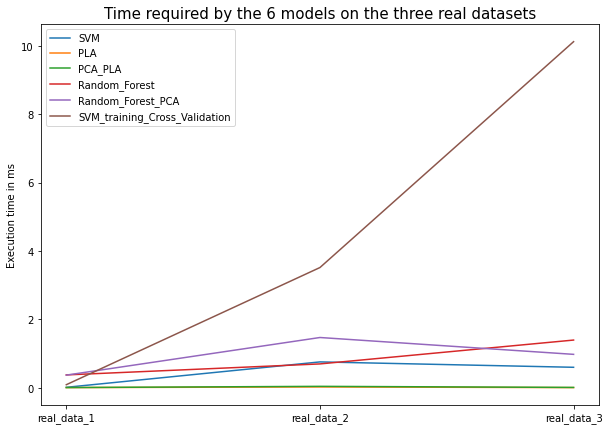

In [195]:
fig = plt.figure(figsize=(10,7))
plt.title("Time required by the 6 models on the three real datasets", size=15)
plt.plot(["real_data_1","real_data_2","real_data_3"],avg_durations[0],label=models[0])
plt.plot(["real_data_1","real_data_2","real_data_3"],avg_durations[1],label=models[1])
plt.plot(["real_data_1","real_data_2","real_data_3"],avg_durations[2],label=models[2])
plt.plot(["real_data_1","real_data_2","real_data_3"],avg_durations[3],label=models[3])
plt.plot(["real_data_1","real_data_2","real_data_3"],avg_durations[4],label=models[4])
plt.plot(["real_data_1","real_data_2","real_data_3"],avg_durations[5],label=models[5])
plt.ylabel("Execution time in ms")
plt.legend()

On the graphics representing the performance scores of each model, we can see that in general more complex models (SVM, SVM + Cross Validation, Random Forest and PCA + Random Forest) perfom better than the simpler ones (PLA and PCA+PLA), but the simpler models take less time to be executed. Goind into the details, we see that the Random Forest algorithm is a good trade-off : it performs really well when not taking that much of time. On the second dataset, we see that PCA PLA is not far from performing as well as the more complex models : here is a good example of maybe selecting this model instead the other ones, since it performs well, and not take a lot of computational ressources. Plus, we generalize much more using this model. 
At the end of the day, one should really care of what model to use and not rush directly into a complex model. 

## Synthetic dataset case 

We define the tests we want to do

In [180]:
def test_time_SVM():
    global X_train, X_val, X_test, y_train, y_val, y_test, f1_scores_synth_data, false_negativ_scores_synth_data,num_runs
    test_error,score_false_negativ = SVM(X_train,X_val,X_test,y_train,y_val,y_test)
    f1_scores_synth_data[0,k] += test_error/num_runs
    false_negativ_scores_synth_data[0,k] += score_false_negativ/num_runs

def test_time_PLA():
    global X_train, X_val, X_test, y_train, y_val, y_test, f1_scores_synth_data, false_negativ_scores_synth_data,num_runs
    test_error,score_false_negativ = PLA(X_train,X_val,X_test,y_train,y_val,y_test)
    f1_scores_synth_data[1,k] += test_error/num_runs
    false_negativ_scores_synth_data[1,k] += score_false_negativ/num_runs

def test_time_PCA_PLA():
    global X_train, X_val, X_test, y_train, y_val, y_test, f1_scores_synth_data, false_negativ_scores_synth_data,num_runs
    test_error,score_false_negativ = PCA_PLA(X_train,X_val,X_test,y_train,y_val,y_test)
    f1_scores_synth_data[2,k] += test_error/num_runs
    false_negativ_scores_synth_data[2,k] += score_false_negativ/num_runs

def test_time_Random_Forest():
    global X_train, X_val, X_test, y_train, y_val, y_test, f1_scores_synth_data, false_negativ_scores_synth_data,num_runs
    test_error,score_false_negativ = Random_Forest(X_train,X_val,X_test,y_train,y_val,y_test)
    f1_scores_synth_data[3,k] += test_error/num_runs
    false_negativ_scores_synth_data[3,k] += score_false_negativ/num_runs

def test_time_Random_Forest_PCA():
    global X_train, X_val, X_test, y_train, y_val, y_test, f1_scores_synth_data, false_negativ_scores_synth_data,num_runs,k
    test_error,score_false_negativ = Random_Forest_PCA(X_train,X_val,X_test,y_train,y_val,y_test)
    f1_scores_synth_data[4,k] += test_error/num_runs
    false_negativ_scores_synth_data[4,k] += score_false_negativ/num_runs

def test_time_SVM_training_Cross_Validation():
    global X_train, X_val, X_test, y_train, y_val, y_test, f1_scores_synth_data, false_negativ_scores_synth_data,num_runs
    test_error,score_false_negativ = SVM_training_Cross_Validation(X_train,X_val,X_test,y_train,y_val,y_test)
    f1_scores_synth_data[5,k] += test_error/num_runs
    false_negativ_scores_synth_data[5,k] += score_false_negativ/num_runs

We define global variables to collect the results of te different tests; In the loop, we create a synthetic data set, that gets bigger at each iteration, and we perform our tests, we collect the results and we plot them afterwards

In [181]:
from sklearn.datasets import make_classification

nb_synth_data = 68
f1_scores_synth_data = np.zeros((nb_models,nb_synth_data))
false_negativ_scores_synth_data = np.zeros((nb_models,nb_synth_data))
avg_durations_synth_data = np.zeros((nb_models,nb_synth_data))

for k in range(nb_synth_data):
    
    X_synth_data,y_synth_data = make_classification((k+2)*10,n_classes=2)
    
    X_train_lb_0, X_valtest_lb_0, y_train_lb_0, y_valtest_lb_0 = train_test_split(X_synth_data[y_synth_data==0],y_synth_data[y_synth_data==0], test_size=0.2)
    X_val_lb_0, X_test_lb_0, y_val_lb_0, y_test_lb_0 = train_test_split(X_valtest_lb_0,y_valtest_lb_0, test_size=0.5)
    X_train_lb_1, X_valtest_lb_1, y_train_lb_1, y_valtest_lb_1 = train_test_split(X_synth_data[y_synth_data==1],y_synth_data[y_synth_data==1], test_size=0.2)
    X_val_lb_1, X_test_lb_1, y_val_lb_1, y_test_lb_1 = train_test_split(X_valtest_lb_1,y_valtest_lb_1, test_size=0.5)
    
    X_train = np.concatenate([X_train_lb_0,X_train_lb_1])
    X_val = np.concatenate([X_val_lb_0,X_val_lb_1])
    X_test = np.concatenate([X_test_lb_0,X_test_lb_1])
    y_train = np.concatenate([y_train_lb_0,y_train_lb_1])
    y_val = np.concatenate([y_val_lb_0,y_val_lb_1])
    y_test = np.concatenate([y_test_lb_0,y_test_lb_1])

    train_indexes = np.arange(len(X_train))
    np.random.shuffle(train_indexes)
    X_train = X_train[train_indexes]
    y_train = y_train[train_indexes]

    val_indexes = np.arange(len(X_val))
    np.random.shuffle(train_indexes)
    X_val = X_val[val_indexes]
    y_val = y_val[val_indexes]

    test_indexes = np.arange(len(X_test))
    np.random.shuffle(test_indexes)
    X_test = X_test[test_indexes]
    y_test = y_test[test_indexes]

    avg_durations_synth_data[0,k] = timeit.Timer(test_time_SVM).timeit(number = num_runs)/num_runs
    avg_durations_synth_data[1,k] = timeit.Timer(test_time_PLA).timeit(number = num_runs)/num_runs
    avg_durations_synth_data[2,k] = timeit.Timer(test_time_PCA_PLA).timeit(number = num_runs)/num_runs
    avg_durations_synth_data[3,k] = timeit.Timer(test_time_Random_Forest).timeit(number = num_runs)/num_runs
    avg_durations_synth_data[4,k] = timeit.Timer(test_time_Random_Forest_PCA).timeit(number = num_runs)/num_runs
    avg_durations_synth_data[5,k] = timeit.Timer(test_time_SVM_training_Cross_Validation).timeit(number = num_runs)/num_runs
    print(f'Synth Data {k} done')




c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Synth Data 0 done


c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Synth Data 1 done
Synth Data 2 done
Synth Data 3 done
Synth Data 4 done
Synth Data 5 done
Synth Data 6 done
Synth Data 7 done
Synth Data 8 done
Synth Data 9 done
Synth Data 10 done
Synth Data 11 done
Synth Data 12 done
Synth Data 13 done
Synth Data 14 done
Synth Data 15 done
Synth Data 16 done
Synth Data 17 done
Synth Data 18 done
Synth Data 19 done
Synth Data 20 done
Synth Data 21 done
Synth Data 22 done
Synth Data 23 done
Synth Data 24 done
Synth Data 25 done
Synth Data 26 done
Synth Data 27 done
Synth Data 28 done
Synth Data 29 done
Synth Data 30 done
Synth Data 31 done
Synth Data 32 done
Synth Data 33 done
Synth Data 34 done
Synth Data 35 done
Synth Data 36 done
Synth Data 37 done
Synth Data 38 done
Synth Data 39 done
Synth Data 40 done
Synth Data 41 done
Synth Data 42 done
Synth Data 43 done
Synth Data 44 done
Synth Data 45 done
Synth Data 46 done
Synth Data 47 done
Synth Data 48 done
Synth Data 49 done
Synth Data 50 done
Synth Data 51 done
Synth Data 52 done
Synth Data 53 done
Sy

### Results

Feel free to comment some plots to visualize better the results for each model

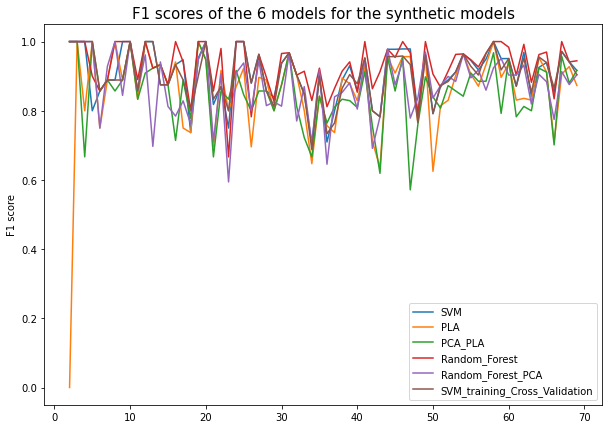

In [192]:
fig = plt.figure(figsize=(10,7))
plt.title("F1 scores of the 6 models for the synthetic models", size=15)
index = np.arange(2,70)
plt.plot(index,f1_scores_synth_data[0],label=models[0])
plt.plot(index,f1_scores_synth_data[1],label=models[1])
plt.plot(index,f1_scores_synth_data[2],label=models[2])
plt.plot(index,f1_scores_synth_data[3],label=models[3])
plt.plot(index,f1_scores_synth_data[4],label=models[4])
plt.plot(index,f1_scores_synth_data[5],label=models[5])
plt.ylabel("F1 score")
plt.legend()

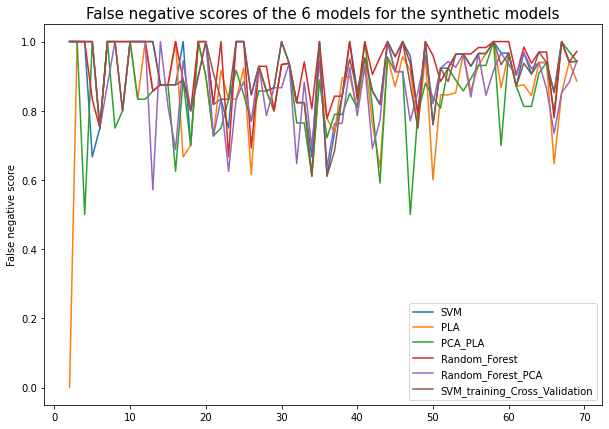

In [194]:
fig = plt.figure(figsize=(10,7))
plt.title("False negative scores of the 6 models for the synthetic models", size=15)
index = np.arange(2,70)
plt.plot(index,false_negativ_scores_synth_data[0],label=models[0])
plt.plot(index,false_negativ_scores_synth_data[1],label=models[1])
plt.plot(index,false_negativ_scores_synth_data[2],label=models[2])
plt.plot(index,false_negativ_scores_synth_data[3],label=models[3])
plt.plot(index,false_negativ_scores_synth_data[4],label=models[4])
plt.plot(index,false_negativ_scores_synth_data[5],label=models[5])
plt.ylabel("False negative score")
plt.legend()

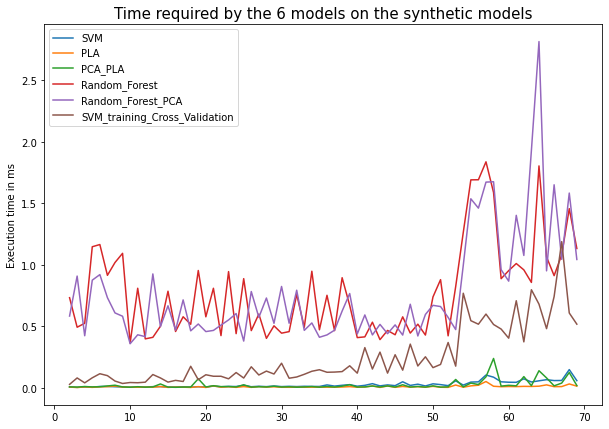

In [196]:
fig = plt.figure(figsize=(10,7))
plt.title("Time required by the 6 models on the synthetic models", size=15)
index = np.arange(2,70)
plt.plot(index,avg_durations_synth_data[0],label=models[0])
plt.plot(index,avg_durations_synth_data[1],label=models[1])
plt.plot(index,avg_durations_synth_data[2],label=models[2])
plt.plot(index,avg_durations_synth_data[3],label=models[3])
plt.plot(index,avg_durations_synth_data[4],label=models[4])
plt.plot(index,avg_durations_synth_data[5],label=models[5])
plt.ylabel("Execution time in ms")
plt.legend()

As before, complex models outperfom simpler models, even if they take less computational ressources. 
Going into more details, the Random Forest algorithm seems to be a good trade-off but also the SVM + Cross Validation, since the synthetic datasets generated are not very big. Adding a PCA step to the Random Forrest algorithm makes it heavier without gaining much more performance, maybe because the dimensional reducing step is useless even counter-productiv, since we do not have at the beginning a lot of features, so we take out important information for the Random Forrest algorithm to classify well the data. 